# This code is for the electronic structure of Su-Schrieffer-Heeger Model
# The homework for Prof Shuai's Theoretical Chemical Physics

In [1]:
import numpy as np

In [2]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

The parameters come from Page 195 of 《高聚物中的孤子和极化子》,
$t$ describes the interaction energy between NN atoms(eV);
$\alpha$ describes the rate for t changes with bond length(Angstrom); K is the elastic constant;

In [5]:
t = 2.5

In [6]:
alpha = 4.1

In [7]:
K = 21.

In [8]:
N = 101 # the lattice length

In [9]:
Ne = 100

The eigenvalue equation writes,
$-[t_0+(-1)^m\alpha(\phi_m+\phi_{m+1})]Z_{\mu,m+1}-[t_0+(-1)^{m-1}\alpha(\phi_{m-1}+\phi_{m})]Z_{\mu, m+1}=\varepsilon_{\mu}Z_{\mu,m}$

coord_add[m-1] is $\phi_{m}+\phi_{m+1}$, we use a open boundary condition here.

In [10]:
coord_add = [0] * (N-1)

In [11]:
iter_num = 0

array([ 0.1046621 , -0.06490181,  0.04393087, -0.0365067 ,  0.02729424,
       -0.02552307,  0.01947616, -0.01966006,  0.0149066 , -0.01599116,
        0.01189021, -0.0134627 ,  0.00973619, -0.01160227,  0.00811019,
       -0.0101664 ,  0.00683061, -0.00901682,  0.00579029, -0.00806915,
        0.00492182, -0.0072689 ,  0.0041807 , -0.00657931,  0.00353627,
       -0.00597463,  0.00296671, -0.00543623,  0.00245604, -0.0049503 ,
        0.00199223, -0.0045063 ,  0.00156602, -0.00409607,  0.00117013,
       -0.00371308,  0.00079873, -0.00335207,  0.00044702, -0.00300867,
        0.000111  , -0.00267917, -0.00021276, -0.00236039, -0.00052727,
       -0.00204949, -0.00083521, -0.00174389, -0.00113906, -0.00144119,
       -0.00144119, -0.00113906, -0.00174389, -0.00083521, -0.00204949,
       -0.00052727, -0.00236039, -0.00021276, -0.00267917,  0.000111  ,
       -0.00300867,  0.00044702, -0.00335207,  0.00079873, -0.00371308,
        0.00117013, -0.00409607,  0.00156602, -0.0045063 ,  0.00

In [29]:
while iter_num < 20:
    iter_num += 1
    sub_diag = [-(t + (-1)**m * alpha * coord_add[m-1])
                for m in range(1, N)]
    Mat = np.diag(sub_diag, k=-1) + np.diag(sub_diag, k=1)
    #Mat[0, -1] = -(t + (-1)**N * alpha * coord_add[-1])
    #Mat[-1, 0] = -(t + (-1)**N * alpha * coord_add[-1])
    eigva, eigve = np.linalg.eigh(Mat)
    ZZ = []
    for i in range(1, N):
        zz = [eigve[i-1, x] * eigve[i, x] for x in range(Ne//2)]
        ZZ.append(2 * np.sum(zz))
    if Ne % 2 != 0:
        ZZ[:N-1] = [(ZZ[x] + eigve[x-1, Ne//2]*eigve[x, Ne//2]) for x in range(1, N)]
        ZZ[-1] = ZZ[-1] + eigve[0, Ne//2]*eigve[-1, Ne//2]
    ZZ_tot = np.sum(ZZ)
    for i in range(1, N):
        coord_add[i-1] = (-1)**(i) * 2 * alpha / K * (ZZ[i-1] - ZZ_tot / (N-1))

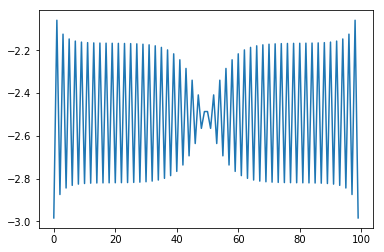

In [30]:
plt.plot(np.diag(Mat, k=1)); plt.show()

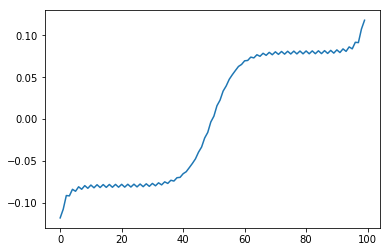

In [31]:
plt.plot(coord_add); plt.show()

In [18]:
for i in range(N-1):
    plt.plot(range(2), [eigva[i]]*2, 'k')

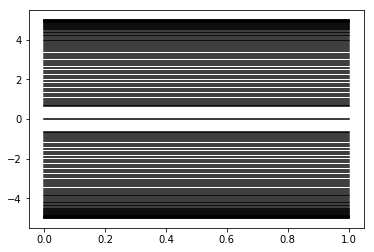

In [19]:
plt.show()

In [20]:
len(coord_add)

100

In [21]:
coeff = np.eye(N-1) + np.diag([1]*(N-2),k=1)

In [22]:
coord = np.linalg.solve(coeff, coord_add)

In [23]:
coord_mean = [x/2 for x in coord_add]

In [24]:
#plt.scatter(range(N-1), coord)

In [25]:
#plt.scatter(range(N), coord_add)

In [34]:
plt.plot(ZZ)

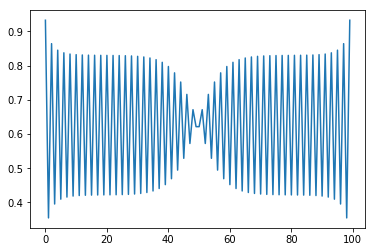

In [35]:
plt.show()